In [1]:
import pandas as pd

df = pd.read_csv('Tesla.csv')

df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,6/29/2010,23.889999
1,6/30/2010,23.830000
2,7/1/2010,21.959999
3,7/2/2010,19.200001
4,7/6/2010,16.110001
...,...,...
1687,3/13/2017,246.169998
1688,3/14/2017,258.000000
1689,3/15/2017,255.729996
1690,3/16/2017,262.049988


In [3]:
df['Date']

0       6/29/2010
1       6/30/2010
2        7/1/2010
3        7/2/2010
4        7/6/2010
          ...    
1687    3/13/2017
1688    3/14/2017
1689    3/15/2017
1690    3/16/2017
1691    3/17/2017
Name: Date, Length: 1692, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(month=month, day=day, year=year)

datetime_object = str_to_datetime('6/29/2010')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Tam\AppData\Local\Temp\ipykernel_1344\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
1687   2017-03-13
1688   2017-03-14
1689   2017-03-15
1690   2017-03-16
1691   2017-03-17
Name: Date, Length: 1692, dtype: datetime64[ns]

In [6]:
df.index = df.pop('Date')
df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996


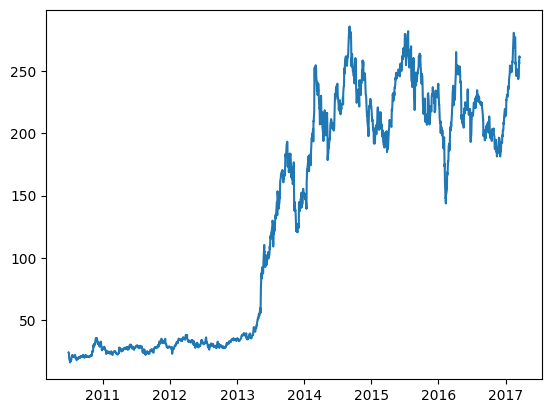

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [8]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return
    
    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
    
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '7/2/2010', 
                                '3/17/2017', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2010-07-02,23.889999,23.830000,21.959999,19.200001
1,2010-07-06,23.830000,21.959999,19.200001,16.110001
2,2010-07-07,21.959999,19.200001,16.110001,15.800000
3,2010-07-08,19.200001,16.110001,15.800000,17.459999
4,2010-07-09,16.110001,15.800000,17.459999,17.400000
...,...,...,...,...,...
1684,2017-03-13,246.869995,244.899994,243.690002,246.169998
1685,2017-03-14,244.899994,243.690002,246.169998,258.000000
1686,2017-03-15,243.690002,246.169998,258.000000,255.729996
1687,2017-03-16,246.169998,258.000000,255.729996,262.049988


In [9]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1689,), (1689, 3, 1), (1689,))

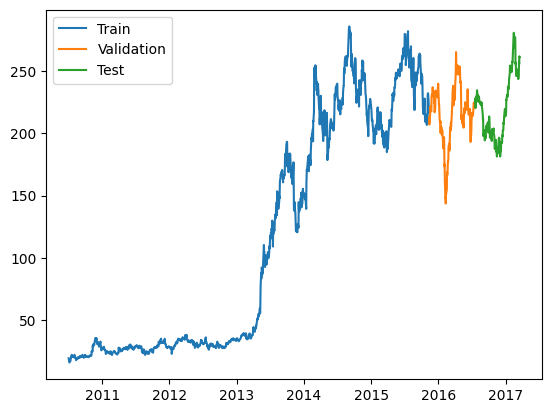

In [10]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
43/43 [==============================] - 5s 26ms/step - loss: 20957.3281 - mean_absolute_error: 110.7583 - val_loss: 46357.1289 - val_mean_absolute_error: 214.0046
Epoch 2/100
43/43 [==============================] - 0s 8ms/step - loss: 19831.6465 - mean_absolute_error: 104.7032 - val_loss: 40991.9648 - val_mean_absolute_error: 201.0555
Epoch 3/100
43/43 [==============================] - 0s 6ms/step - loss: 13553.8223 - mean_absolute_error: 85.3074 - val_loss: 18223.6152 - val_mean_absolute_error: 132.9187
Epoch 4/100
43/43 [==============================] - 0s 7ms/step - loss: 4830.8125 - mean_absolute_error: 51.2876 - val_loss: 1863.8196 - val_mean_absolute_error: 38.9100
Epoch 5/100
43/43 [==============================] - 0s 7ms/step - loss: 349.1736 - mean_absolute_error: 9.2292 - val_loss: 58.2107 - val_mean_absolute_error: 5.6658
Epoch 6/100
43/43 [==============================] - 0s 7ms/step - loss: 44.0043 - mean_absolute_error: 3.8168 - val_loss: 57.3029 - val_m

KeyboardInterrupt: 

43/43 [==============================] - 0s 3ms/step


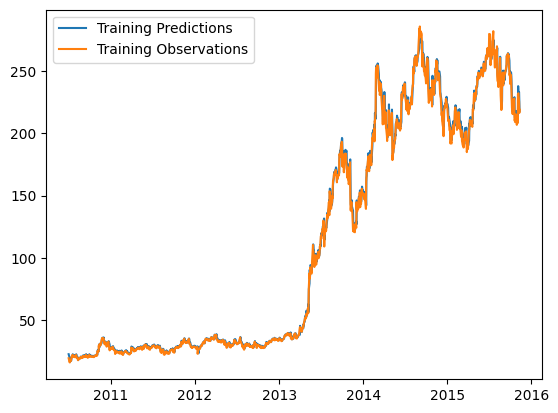

In [16]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

6/6 [==============================] - 0s 6ms/step


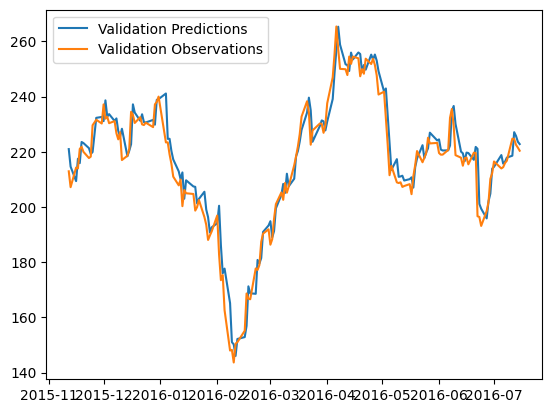

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

6/6 [==============================] - 0s 4ms/step


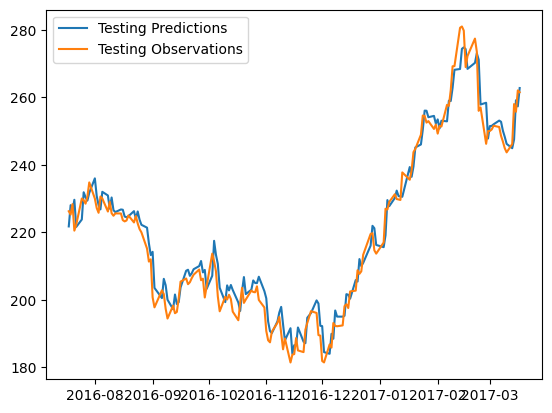

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

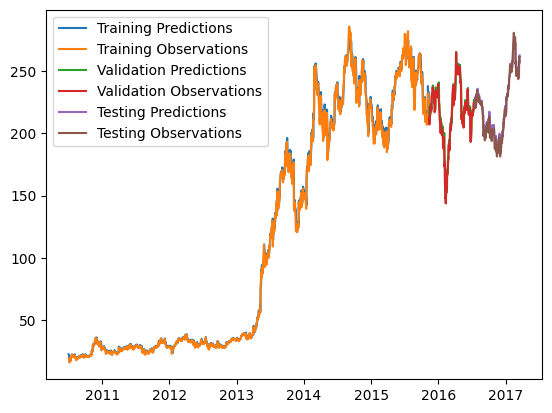

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [20]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 50ms/step


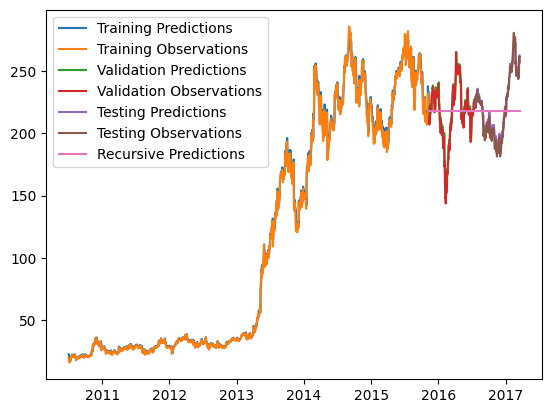

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])